# The $p$-adic Numbers for Data Scientists

Thomas Liebig, Franziska Jahnke - 2023

Find a copy of this material online at [github](https://github.com/thomasliebig/jupyterlite).

Cite as 
```bibtex
@misc{padic23,
  author        = {Thomas Liebig, Franziska Jahnke},
  title         = {The $p$-adic numbers for Data Scientists},
  month         = {June},
  year          = {2023},
  publisher     = {TU Dortmund}
}
```

prerequisites:
```bash
conda update --all
conda install -c conda-forge rise
conda install -c conda-forge jupyter_contrib_nbextensions
conda install nbconvert
pip install -m notebook==6.1.5
jupyter contrib nbextension install --user
jupyter nbextension enable splitcell/splitcell
jupyter-nbextension enable rise --py --sys-prefix
jupyter-nbextension enable rise --py --user
```


<div class="alert alert-block alert-info">
<b>Tip:</b> These Notes are best read without code blocks. Run next cell and press button, to hide all code cells.
</div>

In [1]:
# hide input cells
# copied from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer#answer-28073228
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code cells. (just working in jupyter notebook, not jupyterlab)"></form>''')

## Motivation: Leaving the Reals Behind

$$\begin{align*}
5^2 &=25\\
25^2 &=625\\
625^2 &= 390,625
\end{align*}$$

* *Observation* : Last digits are contained in the square

Does this pattern continue?

$$\begin{align*}
390,625^2 &= 152,587,890,625 \\
90,625^2 &= 8,212,890,625 \\
8,212,890,625^2 &= 67,451,572,418,212,890,925 
\end{align*}$$

* These numbers end in itself
* if you continue you'll reach the point where $n^2=n$ ,i.e., a number with infinitely many digits to the left of the decimal point.
* Why do we care? Isn't this just infinity?

In this course we want to show that these numbers do make sense. These numbers belong to a different number system and allow to solve problems that are impenetrable using ordinary real numbers.


### 10-adic Numbers
lets consider the $10$-adic number system

$$\begin{align*}
\ldots& 23416298634\\
 + \ldots & 98634534523\\
\end{align*}$$

* Can you add them together?

$$\begin{align*}
\ldots& 23416298634\\
 + \ldots & 98634534523\\
\ldots & \overline{22050833157}
\end{align*}$$

* sure, just start right ad add digit by digit

What about Multiplication?
$$\begin{align*}
\ldots& 23416298634\\
 \times \ldots & 98634534523\\
\end{align*}$$

What about Multiplication?
$$\begin{align*}
\ldots& 23416298634\\
 \times \ldots & 98634534523\\
 \ldots & \overline{94538138092} & (4\cdot 98634534523) \\
 \ldots & 59036035690 & (30 \cdot 98634534523) \\
 \ldots &  80720713800 & (600 \cdot 98634534523) \\
 \ldots &  76276184000 & (8000 \cdot 98634534523) \\
 +\ldots &  08107070000 & (90000 \cdot 98634534523) \\
  & \vdots \\
  \ldots & \overline{16150741582}
\end{align*}$$

Let's take the following 10-adic number and multiply it by $7$
$$\begin{align*}
\ldots& 857142857143\\
 \times  & \phantom{00000000000}7\\
 & \overline{\phantom{00000000000}1}
\end{align*}$$

$$\ldots857142857143=\frac{1}{7}$$
* there are rational numbers within the 10-adic numbers
* without having to use the divided by symbol

Exercise: 
* find a number that equals $1/3$ 
* $\ldots???????????=\frac{1}{3}$

$$\begin{align*}
\ldots& \text{?????????????}\\
 \times  & \phantom{00000000000}3\\
 & \overline{000000000001}
\end{align*}$$


$$\begin{align*}
\ldots& \text{666666666667}\\
 \times  & \phantom{00000000000}3\\
  & \overline{\phantom{0000000000}21} \\
  & \phantom{000000000}180 \\
  & \phantom{00000000}1800 \\
  & \phantom{0000000}18000 \\
  & \phantom{000000}180000 \\
  & \phantom{00000}1800000 \\
  & \phantom{0000}18000000 \\
  & \phantom{000}180000000 \\
  & \phantom{00}1800000000 \\
  & \phantom{0}18000000000 \\
  & \phantom{}180000000000 \\
 + \ldots & 800000000000 \\
\ldots & \overline{000000000001}
\end{align*}$$

Let's consider this number
$$\ldots999999999.$$

In [ ]:
$$\tag{1}\ldots999999999.=m$$
$$\tag{2}\ldots9999999990.=10m$$

(1)-(2):
$$9=-9m$$
$$m=-1$$
$$999999999.=-1$$

$$\begin{align*}
\ldots& \text{999999999}\\
 +  & \phantom{00000000}1\\
\ldots & \overline{000000000}
\end{align*}$$

This means $$\ldots 999999996=-4$$

* The 10-adics contain also negative numbers
* no negative sign necessary
* to subtract just add the negative of that number

A simple algorithm to get $-m$ given $m$:
* Take the 9's complement (per digit)
* Add 1

Example:
$$1/3= \ldots 6666667$$
$$-1/3=?$$
$$-1/3=\ldots 3333332+1=\ldots 3333333$$

#### Summary
10-adic numbers
* Addition and Multiplication as expected
* contain fractions and negative numbers without additional symbols
* just one problem: 
  - remember example from the beginning where $n^2=n$, 
  - reformulate $n^2-n=0$, $n(n-1)=0$, 
  - we have more solutions than just $0$ or $1$ to this equation
  - a product could be zero, without any factor being zero
  - this causes problems solving polynomial equations, e.g., $(x+3)(x-7)(x+2)=0$, does not have unique solutions 
  
* to avoid it, we take a prime number base $p$: $p$-adic numbers (any prime is possible)

#### $3$-adic numbers

### Overcoming Archimedian Axiom

### Representing Hierarchical Structure

### Application of Natural Distance Measure

## An Invitation to the Algebra of $p$-adic Numbers

<div class="alert alert-block alert-info">
    <b>Literature:</b><ul><li>Antonio J. Engler and Alexander Prestel. Valued fields. Springer Monographs in Mathematics. Springer-Verlag, Berlin, 2005.</li><li>
Fernando Q. Gouvˆea. p-adic Numbers: An Introduction. Universitext.
    Springer International Publishing, 2020.</li><li>
Jürgen Neukirch. Algebraic number theory, volume 322 of Grundlehren der Mathematischen Wissenschaften [Fundamental Principles of Mathematical Sciences]. Springer-Verlag, Berlin, 1999. Translated from the 1992 German original and with a note by Norbert Schappacher, With a foreword by G. Harder.</li></ul></div>

### Absolute Values, Ostrowski's Theorem

### Completions

### Construction of the $p$-adic numbers

### Topology

### Hensel's Lemma

## A Logician's Point of View: Model Theory of the $p$-adic Numbers

### Reminder: What is first-order Logic?

### Definability: What Subsets can be Described using $\oplus$ and $\odot$?

<div class="alert alert-block alert-info">
    <b>Literature:</b>Angus Macintyre. On definable subsets of p-adic fields. J. Symbolic Logic,
41(3):605–610, 1976.</div>


### VC-dimension in the $p$-adic numbers

<div class="alert alert-block alert-info">
    <b>Literature:</b><ul><li>Matthias Aschenbrenner, Alf Dolich, Deirdre Haskell, Dugald Macpherson,
and Sergei Starchenko. Vapnik-Chervonenkis density in some theories without the independence property, I. Trans. Amer. Math. Soc., 368(8):5889–
5949, 2016. </li><li>

Pierre Simon. A Guide to NIP Theories. Lecture Notes in Logic. Cambridge
University Press, 2015.</li></ul></div>

### Beyond the $p$-adics: VC-dimension in Henselian valued fields

<div class="alert alert-block alert-info">
    <b>Literature:</b><ul><li>Sylvy Anscombe and Franziska Jahnke. Characterizing NIP henselian
fields, 2019.</li><li>

Franziska Jahnke and Pierre Simon. NIP henselian valued fields. Arch.
Math. Logic, 59(1-2):167–178, 2020.</li><li>

Will Johnson. Dp-finite fields VI: the dp-finite Shelah conjecture, 2020.</li></ul></div>


## Where are my $p$-adics? $p$-adic Coding

In [ ]:


### Symmetry in Data Mining and Analysis

<div class="alert alert-block alert-info">
<b>Literature:</b>Fionn Murtagh. Symmetry in data mining and analysis: a unifying view
based on hierarchy. Proceedings of the Steklov Institute of Mathematics,
265(1):177–198, 2009.</div>

### Sparse $p$-adic Coding for Computationally Efficient and Effective Big Data Analysis

<div class="alert alert-block alert-info">
<b>Literature:</b>Fionn Murtagh. Sparse p-adic data coding for computationally efficient
and effective big data analytics. P-Adic Numbers, Ultrametric Analysis,
and Applications, 8(3):236–247, 2016.</div>

### Negative and Non-Kolmogorov Probabilities

<div class="alert alert-block alert-info">
<b>Literature:</b>Andrei Khrennikov. Interpretations of probability. Walter de Gruyter, 2009</div>

## Motivation: negative probabilities 

## Applications 

- Mathematical finance

- Engineering


# Motivation $p-adic$ probability theory and negative probabilities 
## Example 

Let $S$ be an infinite ensemble of balls. Each ball 
has some color $c \in C={0,1,2,\dots, k, \dots}$(countable).
The $S$ has the following colour structure:
there are $n_k=2^k$ balls with the colour $k \in C$ in $S$.
The $volume $N=|S|$ of $S$ is:
$\begin{equation}
N=\sum_{k=0}^{\infty} n_k=\sum_{k=0}^{\infty} 2^k
\end{equation}$




This series deverges in the field of real numbers $\mathbb{R}$, **but** it 
converges in the field of 2-adic numbers $\mathbb{Q_2}$
The sum of series:
$\begin{align}
N=\sum_{k=0}^{\infty} 2^k=\frac{1}{1-2}=-1
\end{align}$

The propotion of balls with colour $k \in C$ in the ensemble $S$:

$\begin{align}
P_S(k)=\frac{n_k}{N}=-2^k
\end{align}$

# Example 

> $n_k=2^k$ is a finite number and $N=-1$ is an infinite number,
the probability $P_S(k)$ is infinitely small probability.

> Such probability is represented by a negative number.

## Ensemble and frequency theory

### Limit

**Case 1** appear for infinite stat ensembles $S$ as the results of the
limit procedure:

$\begin{equation}
P_S(A=\alpha)=\lim\limits_{N \to \infty}\frac{|S(A=\alpha)\cap S_N|}{|S|},
\end{equation}$
where a sequence of finite ensembles $\{S_N\}$ gives an approximation of the infinite ensembles $S$. 

**Case 2**
If this limit does not exst in $\mathbb{R}$, then by the regularization procedures like the summation of divergent series or integrals 
can induce negative values for the probabilities.
$\begin{equation}
P_S(A=\alpha)=\frac{|S(A=\alpha) \cap S_N|}{|S|}
\end{equation}$



## Split of conventional probabilities

In $p-adic$ frameworks this limit can exist and is equal to zero.

> $P_S(A=n)=\lim\limits_{N \to \infty} \frac{1}{N}=0$ for all $n=1,2,\dots.$ Some regularization of this limit
can produce nonzero coefficient $P_S^reg(\alpha)$ 
In $p-adic$ framework with respect to $p-adic$ topology such coefficients are always **negative**.


> Regularization of $limit$ can induce the split of zero conventional probabilities.
These new labels can be defined as infinitely small probabilities.


In $p-adic$ examples such new probabilities are given by 
rational numbers larger than $1$.
Similar splits can be obtained for $q \in (0,1)$.
In $0<q<1, q\in \mathbb{Q}$, then there are two sets of labels:
$L_{<q}$ and $L_{>q}$. Thus we have $L_{<q}\subset \mathbb{Q} \cap (-\infty,0)$ 
and $L_{>q}\subset \mathbb{Q} \cap (1,+\infty)$

- $q<0$ and $q>0$ demonstrate the violation of the principle
of the statistical stabilization.

- they also describe the finite(hidden)
 internal structure of some Mises´ collectives.

- infinite sums of infinitely small(**negative**) probabilities might produce conventional
**positive** probabilities.

- nonexistance of conventional conditional probabilities implies
negativity of generalized conditional probabilities.

## $P$-adic probability theory

$P$-adic analysis gives the possibility to use actual infinities and consider statistical ensembles
with an infinite number of elements. Probabilities are defined via the standard proportion.
>**Properties**:
- negative (rational) probabilities.
- probabilities which are larger than 1.
- the corresponding probabilistic measure is not well defined on a set algebra(the system of events is only a set of semi-algebra)

The rules for $p$-adic probabilities:
- Defining the (partial) order $O$ on the set of $p$-adic integers $\mathbb{Z}_{p}$
- Comparing the probabilities with $p$-adic volume $n(A)$ where $A$ is an event. 
> >Thus we say the probability $P(A)$ is larger than probability of $P(B)$ if the $p$-adic volume $n(B)>n(A$).

## Applying what we've learned: $p$-adic computations

### Exact Solving Linear Matrix Equations

<div class="alert alert-block alert-info">
<b>Literature:</b> John D Dixon. Exact solution of linear equations using p-adic expansions. Numerische Mathematik, 40(1):137–141, 1982.
</div>

### Classification Models $\mathbb{Q}^n_p\mapsto \{0,1\}$

<div class="alert alert-block alert-info">
<b>Literature:</b><ul><li> Patrick Erik Bradley. On p-adic classification. p-Adic Numbers, Ultrametric
Analysis, and Applications, 1(4):271–285, 2009. </li> <li>   
Andrei Khrennikov and Brunello Tirozzi. Learning of p-adic neural networks. Can. Math. Soc. Proc. Ser, 29:395–401, 2000. </li></ul>
</div>

### Multi-modulus Parallelism

<div class="alert alert-block alert-info">
<b>Literature:</b> Xinkai Li, Chao Lu, and Jon A Sjogren. Parallel implementation of exact matrix computation using multiple p-adic arithmetic. In 2013 14th
ACIS International Conference on Software Engineering, Artificial Intelligence, Networking and Parallel/Distributed Computing, pages 296–302.
IEEE, 2013.</div>

### $p$-adic Random Graphs

<div class="alert alert-block alert-info"> <b>Literature:</b> Hao Hua and Ludger Hovestadt. p-adic numbers encode complex networks.
Scientific Reports, 11(1):1–11, 2021.</div>

In [2]:
def p_adic_expansion(rational_number, p):

    numerator, denominator = abs(rational_number.numerator), abs(rational_number.denominator)

    # Compute the numerator and denominator in base p
    numerator_digits = []
    while numerator > 0:
        numerator, digit = divmod(numerator, p)
        numerator_digits.append(digit)

    denominator_digits = []
    while denominator > 0:
        denominator, digit = divmod(denominator, p)
        denominator_digits.append(digit)

    # Add trailing zeros to the shorter list to make them equal length
    max_length = max(len(numerator_digits), len(denominator_digits))
    numerator_digits += [0] * (max_length - len(numerator_digits))
    denominator_digits += [0] * (max_length - len(denominator_digits))

    # Divide digit by digit to get the p-adic expansion
    expansion = []
    carry = 0
    for i in range(max_length):
        digit = numerator_digits[i] - carry
        if digit < denominator_digits[i]:
            digit += p
            carry = 1
        else:
            carry = 0
        expansion.append(digit - denominator_digits[i])

    # Handle negative numbers
    if rational_number < 0:
        expansion = [-x % p for x in expansion]

    # Remove trailing zeros
    while len(expansion) > 1 and expansion[-1] == 0:
        expansion.pop()

    return expansion

from fractions import Fraction
p_adic_expansion(Fraction(-7,1), 2)



[0, 1, 1]

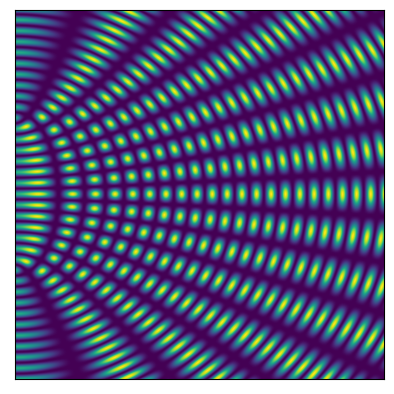

In [3]:
# https://inf.news/en/science/e7c333118b26c25afc7938fdf2e411fa.html
import numpy as np
import matplotlib.pyplot as plt
import random

v=3*(10**8)*(10**6)*(10**(-15)) 

L=0.589

w=2*np.pi*v/L

def func_A(t,q,x,y,x0,y0):
    r = ((x - x0) ** 2 + (y - y0) ** 2) ** 0.5
    A=np.cos(w*(t-r/v)+q)
    return A

fig, ax = plt.subplots()

ax.set_xticks([])
ax.set_yticks([])

def f(t,x, y):
    A1 = func_A(t, 0,x, y, 0, 2)
    A2 = func_A(t,0, x, y, 0, -2)
    return ((A1+A2)**2)

x = np.linspace(0, 8, 1000)
y = np.linspace(-5, 5, 1000).reshape(-1, 1)

ax.imshow(f(0,x, y))

plt.show()

In [4]:
https://en.wikipedia.org/wiki/Wigner_quasiprobability_distribution

SyntaxError: invalid syntax (378235354.py, line 1)